**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# I. Perkenalan

### Graded Challenge 1 - P1

- Name   : Nabila Edelliana Khairunnisa
- Batch  : 011

### Description
Project tugas ini bertujuan untuk mendalami lebih lanjut dasar-dasar data science khususnya konsep regression.

Data yang di olah merupakan data jasa transportasi .
### Objective
1. Membuat machine learning untuk prediksi price dari jasa transportasi
2. Mengetahui performa model linear yang telah dibuat
3. Mengetahui hasil prediksi data inference
4. Mengetahui besar pengaruh fitur terhadap nilai prediksi price

### Problem Statement

1. Model linear manakah yang paling baik untuk memprediksi price?
2. Bagaimana hasil metrics evaluasi terhadap model?
3. Bagaimana pengaruh fitur terhadap prediksi price?

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

# II. Import Pustaka yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# III. Data Loading

### 3.1. Mengimpor data csv

In [2]:
data = pd.read_csv('rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# Membuat salinan data untuk berjaga-jaga
data_copy = data.copy()

### 3.1. Melihat overview data

In [4]:
# mengecek ukuran dataset
data.shape

(693071, 57)

# IV. Exploratory Data Analysis (EDA)

In [5]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Dari dataframe tersebut, saya ingin membuat suatu machine learning yang dapat memprediksi price dari setiap jasa transportasi. Fitur-fitur yang menurut saya berpengaruh pada nilai price adalah cab_type, distance, dan cuaca (short_summary)

ada terlalu banyak kolom. Akan saya fokuskan ke kolom-kolom yang digunakan dengan menghapus kolom yang tidak digunakan.

In [6]:
# Menghapus kolom yang tidak digunakan
data.drop(['id', 'source', 'timestamp', 'latitude','longitude','datetime', 'destination','hour','day','month','timezone', 'product_id', 'name', 'surge_multiplier', 'temperature', 'apparentTemperature', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime'], axis = 1, inplace=True)

In [7]:
data.head()

,cab_type,price,distance,short_summary
0,Lyft,5.0,0.44,Mostly Cloudy
1,Lyft,11.0,0.44,Rain
2,Lyft,7.0,0.44,Clear
3,Lyft,26.0,0.44,Clear
4,Lyft,9.0,0.44,Partly Cloudy


In [8]:
# melihat ringkasan dataframe yang baru
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cab_type       693071 non-null  object 
 1   price          637976 non-null  float64
 2   distance       693071 non-null  float64
 3   short_summary  693071 non-null  object 
dtypes: float64(2), object(2)
memory usage: 21.2+ MB


Ternyata dari pengecekan informasi dataframe yang baru, tidak ada data null di setiap kolomnya.

In [9]:
# Mengecek descriptive statistic dari data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,637976.0,16.545125,9.324359,2.50,9.00,13.50,22.50,97.50
distance,693071.0,2.189430,1.138937,0.02,1.28,2.16,2.92,7.86


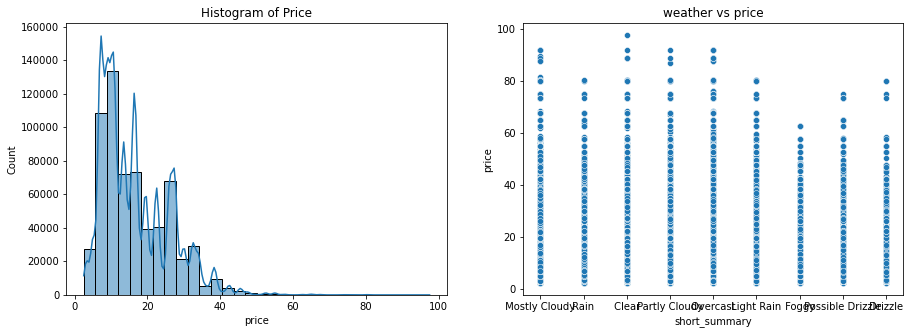

In [10]:
# Membuat Histogram dan Scatter Plot Weather vs Price

plt.figure(figsize=(15,5)) # panjang x lebar
plt.subplot(1, 2, 1) # 1 baris, 2 kolom, index 1
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Histogram of Price')

plt.subplot(1, 2, 2) # 1 baris, 2 kolom, index 2
sns.scatterplot(x='short_summary', y='price', data=data)
plt.title('weather vs price')

plt.show()

dari histogram di atas terlihat bahwa data price right-skewed, sedangkan data weather vs price memiliki plotting data yang tidak membentuk regresi.

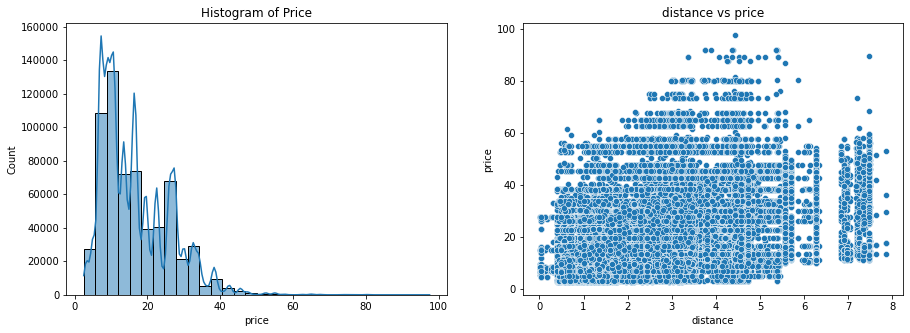

In [11]:
# Membuat Histogram dan Scatter Plot Distance vs Price

plt.figure(figsize=(15,5)) # panjang x lebar
plt.subplot(1, 2, 1) # 1 baris, 2 kolom, index 1
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Histogram of Price')

plt.subplot(1, 2, 2) # 1 baris, 2 kolom, index 2
sns.scatterplot(x='distance', y='price', data=data)
plt.title('distance vs price')

plt.show()

dari scatterplot tersebut, ternyata semakin jauh jaraknya, belum tentu juga semakin tinggi price nya.

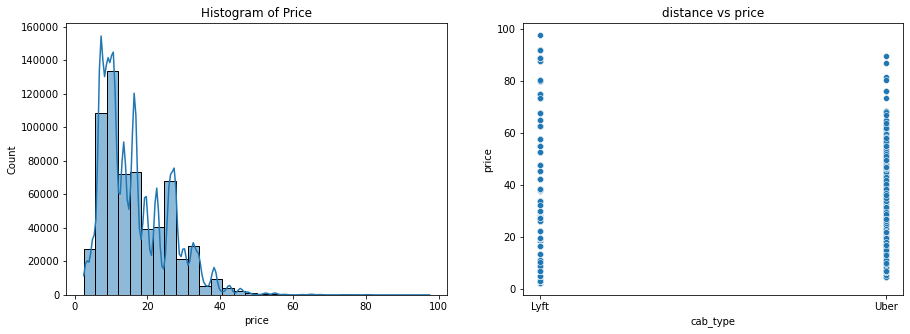

In [12]:
# Membuat Histogram dan Scatter Plot Distance vs Price

plt.figure(figsize=(15,5)) # panjang x lebar
plt.subplot(1, 2, 1) # 1 baris, 2 kolom, index 1
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Histogram of Price')

plt.subplot(1, 2, 2) # 1 baris, 2 kolom, index 2
sns.scatterplot(x='cab_type', y='price', data=data)
plt.title('distance vs price')

plt.show()

dari scatterplot di atas, jenis cab_type tidak memiliki pattern khusus yang menggambarkan hubungannya dengan price. dari scatterplot tersebut juga terlihat bahwa sepertinya cab_type kurang berpengaruh terhadap variansi price. 

Saya ingin mengetahui rerata distance, namun terlebih dahulu saya kategorikan dulu menjadi near, medium, dan far agar saya bisa lebih mudah memahaminya.

In [13]:
# Membuat list jarak per kategori
conditions = [
    (data['distance'] <= 2),
    (data['distance'] > 2) & (data['distance'] <= 5),
    (data['distance'] > 5)
]

# membuat list categori jarak
cat = ['near', 'medium', 'far']

# Membuat kolom baru yang akan di assign dari setiap kategore jarak
data['distCat'] = np.select(conditions, cat)

In [14]:
data.groupby(['distCat'])[['distCat', 'price']].mean()

,price
distCat,
far,26.319222
medium,18.792360
near,13.750487


In [15]:
data.groupby(['short_summary'])[['short_summary','price']].mean()

,price
short_summary,
Clear,16.486460
Drizzle,16.501784
Foggy,16.540883
Light Rain,16.561282
Mostly Cloudy,16.594419
Overcast,16.535116
Partly Cloudy,16.552009
Possible Drizzle,16.481390
Rain,16.539987


ternyata rerata price untuk setiap kondisi cuaca hampir sama.

Saya ingin melihat rerata price di tiap kondisi cuaca berdasarkan jarak/distance

In [16]:
data.groupby(['short_summary', 'distCat'])[['short_summary', 'price']].mean()

price
short_summary      distCat           
 Clear             far      25.676654
                   medium   18.706375
                   near     13.730751
 Drizzle           far      26.598901
                   medium   18.882029
                   near     13.634108
 Foggy             far      25.697368
                   medium   18.712835
                   near     13.882096
 Light Rain        far      26.513857
                   medium   18.794196
                   near     13.771670
 Mostly Cloudy     far      26.487782
                   medium   18.850413
                   near     13.783081
 Overcast          far      26.324299
                   medium   18.770724
                   near     13.746464
 Partly Cloudy     far      26.393307
                   medium   18.830557
                   near     13.720272
 Possible Drizzle  far      25.303371
                   medium   18.781499
                   near     13.708566
 Rain              far      27.651989
                   medium   18.750699
                   near     13.790856

Setelah setelah distance dipertimbangkan, ternyata rerata price di tiap kondisi cuaca dan dengan kelas distance yang sama memiliki mean yang mirip. Hal ini memperkuat dugaan bahwa distance menjadi faktor terbesar pengaruh nilai price.

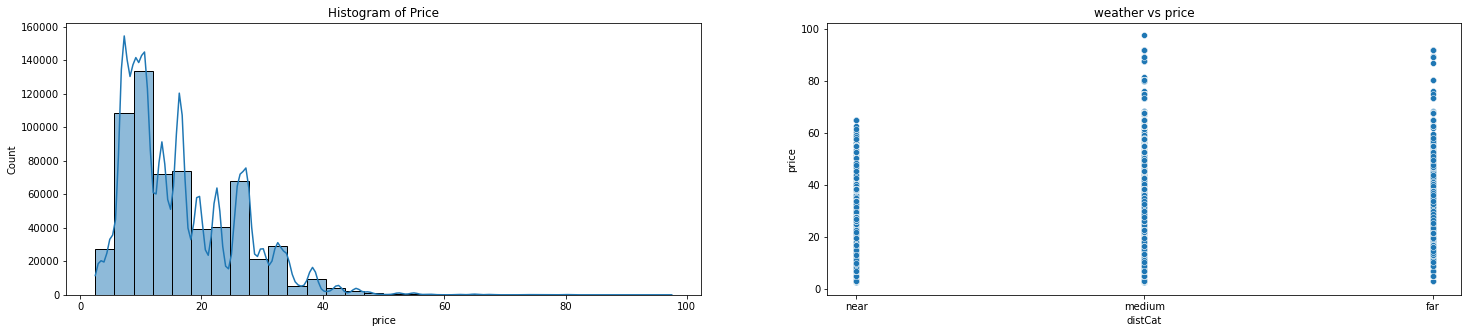

In [17]:
# Create Histogram and Scatter Plot

plt.figure(figsize=(25,5)) # panjang x lebar
plt.subplot(1, 2, 1) # 1 baris, 2 kolom, index 1
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Histogram of Price')

plt.subplot(1, 2, 2) # 1 baris, 2 kolom, index 2
sns.scatterplot(x='distCat', y='price', data=data)
plt.title('weather vs price')

plt.show()

dari scatterplot kategori distance dan price, terdapat sesuatu yang menurut saya agak janggal, yaitu seharusnya jika memang hubungan distance dan price kuat, maka ia akan membentuk suatu pattern yang bisa menggambarkan perbandingan lurus antara pertambahan distance dan price.

# V. Data Preprocessing

## 5.1. Get data for model inference

di segmen ini saya akan menyiapkan data inference untuk nantinya dimasukkan ke dalam model.

In [18]:
# Get data for model inference.
# Data inference tidak boleh ada di train dan test. jadi datanya tuh dibagi buat 3 peruntukan.

data_inf = data.sample(10, random_state=17)   # ambil 10 sampel, random state gunanya untuk biar ga berubah2, nilainya 17. Nilainya terserah gada pengaruhnya
data_inf

,cab_type,price,distance,short_summary,distCat
470612,Uber,NaN,0.39,Mostly Cloudy,near
685801,Lyft,9.0,2.20,Partly Cloudy,medium
427160,Uber,16.5,1.16,Mostly Cloudy,near
499740,Uber,15.0,5.70,Overcast,far
226985,Uber,30.5,4.55,Overcast,medium
435550,Lyft,27.5,0.98,Partly Cloudy,near
654282,Uber,9.5,1.92,Light Rain,near
493584,Lyft,10.5,1.02,Overcast,near
88813,Uber,10.0,2.98,Overcast,medium
360264,Uber,28.0,1.84,Clear,near


In [19]:
# Remove inference-set

data_train_test = data.drop(data_inf.index)
data_train_test

,cab_type,price,distance,short_summary,distCat
0,Lyft,5.0,0.44,Mostly Cloudy,near
1,Lyft,11.0,0.44,Rain,near
2,Lyft,7.0,0.44,Clear,near
3,Lyft,26.0,0.44,Clear,near
4,Lyft,9.0,0.44,Partly Cloudy,near
...,...,...,...,...,...
693066,Uber,13.0,1.00,Partly Cloudy,near
693067,Uber,9.5,1.00,Partly Cloudy,near
693068,Uber,NaN,1.00,Partly Cloudy,near
693069,Uber,27.0,1.00,Partly Cloudy,near


In [20]:
# Reset index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_train_test.head()

,cab_type,price,distance,short_summary,distCat
0,Lyft,5.0,0.44,Mostly Cloudy,near
1,Lyft,11.0,0.44,Rain,near
2,Lyft,7.0,0.44,Clear,near
3,Lyft,26.0,0.44,Clear,near
4,Lyft,9.0,0.44,Partly Cloudy,near


## 5.2. Splitting Dataset

In [21]:
# Split between 'X' (features) and 'y' (target)
X = data_train_test.drop('price', axis = 1)
y = data_train_test['price']
X.head()

,cab_type,distance,short_summary,distCat
0,Lyft,0.44,Mostly Cloudy,near
1,Lyft,0.44,Rain,near
2,Lyft,0.44,Clear,near
3,Lyft,0.44,Clear,near
4,Lyft,0.44,Partly Cloudy,near


In [22]:
# Split between train-set and test-set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17) # sebanyak 20% data jadi data test, 80% train

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (554448, 4)
Test Size :  (138613, 4)


## 5.3. Outlier Handling

### Outlier Detection

In [23]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

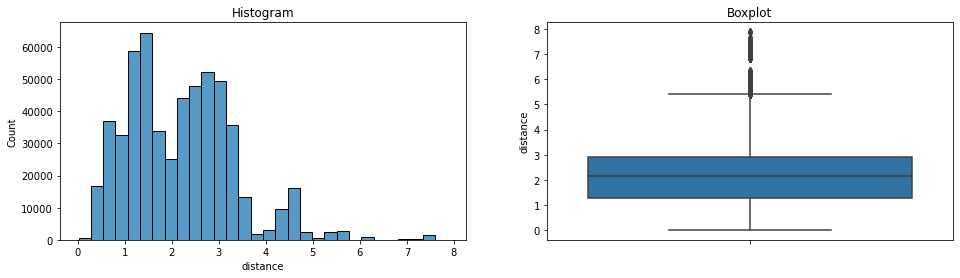

In [24]:
# Let's find outliers in distance and price

diagnostic_plots(X_train, 'distance')

In [25]:
X_train['distance'].skew()

0.8336827140071665

In [26]:
y_train.skew()

1.0489029290655296

data fitur dan target tersebut memiliki skewness positif sehingga data tersebut right-skewed dimana terdapat banyak outlier di sebelah kanan/atas.

Karena datanya skewed, saya akan deteksi outlier dengan metode IQR.

In [27]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [28]:
upper_dis, lower_dis = find_skewed_boundaries(X_train, 'distance', 1.5)
upper_dis, lower_dis

(5.42, -1.2200000000000002)

In [29]:
print('Total data: {}'.format(len(X_train)))
print('Data with distance bigger than 5.42   : {}'.format(len(X_train[X_train['distance'] > upper_dis])))
print('')
print('% data with distance bigger than 5.42 : {}'.format(len(X_train[X_train['distance'] > upper_dis])/len(X_train) * 100))

Total data: 554448
Data with distance bigger than 5.42   : 6166

% data with distance bigger than 5.42 : 1.1120970767321734


In [30]:
IQR = y_train.quantile(0.75) - y_train.quantile(0.25)

lower_pri = y_train.quantile(0.25) - (IQR * 1.5)
upper_pri = y_train.quantile(0.75) + (IQR * 1.5)

upper_pri, lower_pri

(42.75, -11.25)

In [31]:
print('Total data: {}'.format(len(y_train)))
print('Data with price bigger than 42.75   : {}'.format(len([y_train > upper_pri])))
print('')
print('% data with price bigger than 42.75 : {}'.format(len([y_train > upper_pri])/len(y_train) * 100))

Total data: 554448
Data with price bigger than 42.75   : 1

% data with price bigger than 42.75 : 0.00018035956482844196


ternyata hanya ada 1.1% data outlier di fitur distance dan 0.00018% outlier di fitur price. Maka saya akan handling dengan metode trimming karena saya juga ingin mempertahankan hubungan antar-variabel.

### Outlier Handling - Trimming

In [32]:
# Flag the outliers in category `DIS`
outliers_distance = np.where(X_train['distance'] > upper_dis, True,
                       np.where(X_train['distance'] < lower_dis, True, False))
outliers_price = np.where(y_train > upper_pri, True,
                       np.where(y_train < lower_pri, True, False))

In [33]:
X_train_trimmed = X_train.loc[~(outliers_distance)]
print('Size X_train dataset - Before trimming : ', X_train.shape)
print('Size X_train dataset - After trimming  : ', X_train_trimmed.shape)

y_train_trimmed = y_train.loc[~(outliers_price)]
print('Size y_train dataset - Before trimming close : ', y_train.shape)
print('Size y_train dataset - After trimming close  : ', y_train_trimmed.shape)

Size X_train dataset - Before trimming :  (554448, 4)
Size X_train dataset - After trimming  :  (548282, 4)
Size y_train dataset - Before trimming close :  (554448,)
Size y_train dataset - After trimming close  :  (549966,)


In [34]:
(554448 - 548282)/554448 * 100

1.1120970767321734

In [35]:
(554448-549966)/554448*100

0.808371569561077

distance - Before Trimming


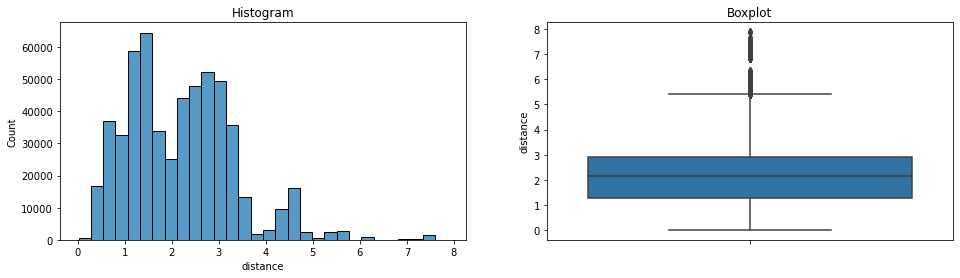


distance - After Trimming


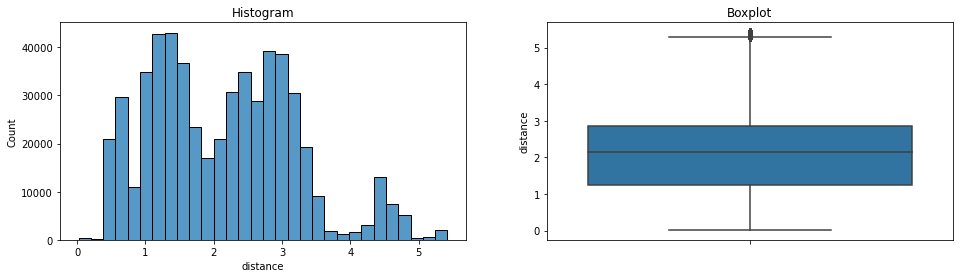

In [36]:
# Let's find outliers in distance

print('distance - Before Trimming')
diagnostic_plots(X_train, 'distance')
print('\ndistance - After Trimming')
diagnostic_plots(X_train_trimmed, 'distance')

## 5.4. Handling Missing Value

Pertama, saya mengecek adanya missing value dari set data train dan test.

In [37]:
X_train.isna().sum()

cab_type         0
distance         0
short_summary    0
distCat          0
dtype: int64

In [38]:
X_test.isna().sum()

cab_type         0
distance         0
short_summary    0
distCat          0
dtype: int64

In [39]:
y_train.isna().sum()

43922

In [40]:
y_train.shape

(554448,)

terdapat missing values di y_train sebanyak 43922

In [41]:
# menghitung persentase missing values price di y_train
43922/554448*100

7.921752806394829

In [42]:
y_test.isna().sum()

11172

In [43]:
y_test.shape

(138613,)

terdapat missing values di y_train sebanyak 11172

In [44]:
# menghitung persentase missing values price di y_train
11172/138613*100

8.059850086211249

ternyata terdapat missing value di y baik set train maupun set test lebih dari 5%, maka metode yang digunakan untuk handling missing value di y_train dan y_test adalah median imputation karena data ini right-skewed. Median yang digunakan adalah median dari price di data y_train. 

In [45]:
y_train.median()

13.5

In [46]:
# menampilkan median price per kategori distance dari data keseluruhan
data.groupby(['distCat'])[['distCat', 'price']].median()

,price
distCat,
far,24.5
medium,16.5
near,11.5


median di atas hanya sebagai gambaran/pembanding untuk median price selanjutnya di bawah ini untuk data train dan test.

median yang akan digunakan untuk imputasi adalah median dari y_train set yaitu 13.5

In [47]:
# membuat fungsi untuk in=mputasi na
def impute(df, median_value):
    df = df.fillna(median_value)
    return df

In [48]:
y_train_ = impute(y_train, 13.5)
y_test_ = impute(y_test, 13.5)

In [49]:
y_train_.isna().sum()

0

In [50]:
y_train_.head()

190502    10.5
119148    34.0
603648    25.0
269185    27.5
632624    16.0
Name: price, dtype: float64

In [51]:
y_train.mean()

16.54280389245601

In [52]:
y_train_.mean()

16.301760489712287

In [53]:
y_test_.isna().sum()

0

In [54]:
y_test.mean()

16.554366177289882

In [55]:
y_test_.mean()

16.308188842316376

setelah dilakukan imputasi : 
- sudah tidak ada lagi nilai na dari y_train dan y_test.
- mean y_train berubah dari 16.54 menjadi 16.30
- mean y_test berubah dari 16.55 menjadi 16.30

## 5.4. Feature Selection

segmen ini berguna untuk memisahkan kolom numerik dan kategorikal untuk proses scaling dan encoding.

In [56]:
# Get numerical columns and categorical columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical columns : ', num_columns)
print('Categorical columns : ', cat_columns)

Numerical columns :  ['distance']
Categorical columns :  ['cab_type', 'short_summary', 'distCat']


In [57]:
# Split Train-set and Test-set based on column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## 5.5. Feature Scaling

In [58]:
# Display X_train_num

X_train_num.head()

,distance
190502,3.01
119148,2.65
603648,3.20
269185,1.03
632624,2.88


Saya ingin mempertahankan distribusi data sehingga saya akan lebih memilih MinMaxScaler daripada algoritma scaler lainnya. Selain itu, Scaler ini dapat mentransformasi range nya menjadi 0 s/d 1 sehingga bisa lebih sederhana untuk dipahami/diolah.

In [59]:
# Feature scaling using MinMaxScaler, defaultnya jadi range 0 s/d 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num) # .fit hanya milik train

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.38137755],
       [0.33545918],
       [0.40561224],
       ...,
       [0.12882653],
       [0.2130102 ],
       [0.24872449]])

## 5.6. Feature Encoding

In [60]:
# Display X_train_cat
X_train_cat.head()

,cab_type,short_summary,distCat
190502,Lyft,Overcast,medium
119148,Lyft,Mostly Cloudy,medium
603648,Uber,Overcast,medium
269185,Uber,Overcast,near
632624,Uber,Clear,medium


In [61]:
# feature Encoding using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[0., 5., 1.],
       [0., 4., 1.],
       [1., 5., 1.],
       ...,
       [0., 7., 2.],
       [0., 5., 2.],
       [1., 6., 2.]])

hasil encoding :
- kolom cab_type :
    - Lyft(0)
    - Uber(1)
- kolom short_summary :
    - Overcast (5)
    - Mostly Cloudy	(4)
    - dst
- kolom dist_cat :
    - medium (1)
    - dst

## 5.7. Merge/Concat between scaled num columns and encoded cat columns

In [62]:
# Concat columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final

array([[0.38137755, 0.        , 5.        , 1.        ],
       [0.33545918, 0.        , 4.        , 1.        ],
       [0.40561224, 1.        , 5.        , 1.        ],
       ...,
       [0.12882653, 0.        , 7.        , 2.        ],
       [0.2130102 , 0.        , 5.        , 2.        ],
       [0.24872449, 1.        , 6.        , 2.        ]])

In [63]:
# Display as DataFrame

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns+cat_columns])
X_train_final_df.head()

,distance,cab_type,short_summary,distCat
0,0.381378,0.0,5.0,1.0
1,0.335459,0.0,4.0,1.0
2,0.405612,1.0,5.0,1.0
3,0.128827,1.0,5.0,2.0
4,0.364796,1.0,0.0,1.0


# VI. Model Definition

Saya akan mencoba beberapa model dan nantinya akan dievaluasi model mana yang paling bestfit.

In [64]:
# Training using LinearRegression

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

model_lin_reg = LinearRegression()
ridge_model = Ridge(alpha=10)
lasso_model = Lasso()
elastic_model = ElasticNet()



# VII. Model Training

## 7.1. Training Linear Regression

In [65]:
# Train the model

model_lin_reg.fit(X_train_final, y_train_)

LinearRegression()

In [66]:
# Predict train-set and test-set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

y_pred_train

array([19.50355505, 18.57292035, 18.09034315, ..., 14.36716663,
       16.04631772, 14.87104955])

## 7.2. Training Linear Regression Ridge

In [67]:
ridge_model.fit(X_train_final,y_train_)

Ridge(alpha=10)

In [68]:
ridge_pred_train = ridge_model.predict(X_train_final)
ridge_pred_test = ridge_model.predict(X_test_final)

## 7.2. Training Linear Regression Lasso

In [69]:
lasso_model.fit(X_train_final,y_train_)

Lasso()

In [70]:
lasso_pred_train = lasso_model.predict(X_train_final)
lasso_pred_test = lasso_model.predict(X_test_final)

## 7.2. Training Linear Regression ElasticNet

In [71]:
elastic_model.fit(X_train_final,y_train_)

ElasticNet()

In [72]:
elastic_pred_train = elastic_model.predict(X_train_final)
elastic_pred_test = elastic_model.predict(X_test_final)

# VIII. Model Evaluation

## 8.1. Model Evaluation : Linear Regression

In [73]:
# Evaluate Linear Regression Model

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE Train-Set Linear : ', mean_absolute_error(y_train_, y_pred_train))
print('MAE Test-Set Linear : ', mean_absolute_error(y_test_, y_pred_test))

print('MSE Train-Set Linear : ', mean_squared_error(y_train_, y_pred_train))
print('MSE Test-Set Linear : ', mean_squared_error(y_test_, y_pred_test))

print('RMSE Train-Set Linear : ', np.sqrt(mean_squared_error(y_train_, y_pred_train)))
print('RMSE Test-Set Linear : ', np.sqrt(mean_squared_error(y_test_, y_pred_test)))

print('R2 Train-Set Linear : ', r2_score(y_train_, y_pred_train))
print('R2 Test-Set Linear : ', r2_score(y_test_, y_pred_test))

MAE Train-Set Linear :  6.687008589221407
MAE Test-Set Linear :  6.678357984267176
MSE Train-Set Linear :  71.14209856878135
MSE Test-Set Linear :  70.97466371862338
RMSE Train-Set Linear :  8.434577557221306
RMSE Test-Set Linear :  8.424646207326655
R2 Train-Set Linear :  0.11906429059525314
R2 Test-Set Linear :  0.11859302667214255


## 8.2. Model Evaluation : Linear Model Ridge

In [74]:
# Evaluate Linear Regression Model Ridge

print('MAE train Ridge = ', mean_absolute_error(y_train_, ridge_pred_train))
print('MAE test Ridge = ', mean_absolute_error(y_test_, ridge_pred_test))

print('MSE train Ridge = ', mean_squared_error(y_train_, ridge_pred_train))
print('MSE test Ridge = ', mean_squared_error(y_test_, ridge_pred_test))

print('RMSE train Ridge = ', np.sqrt(mean_squared_error(y_train_, ridge_pred_train)))
print('RMSE test Ridge = ', np.sqrt(mean_squared_error(y_test_, ridge_pred_test)))

print('r2score train Ridge = ', r2_score(y_train_, ridge_pred_train))
print('r2score test Ridge = ', r2_score(y_test_, ridge_pred_test))

MAE train Ridge =  6.6871064628785915
MAE test Ridge =  6.678459785551147
MSE train Ridge =  71.14212224259914
MSE test Ridge =  70.97484593263839
RMSE train Ridge =  8.434578960600176
RMSE test Ridge =  8.424657021661973
r2score train Ridge =  0.11906399744799023
r2score test Ridge =  0.11859076382657141


## 8.3. Model Evaluation : Linear Model Lasso

In [75]:
print('MAE train Lasso = ', mean_absolute_error(y_train_, lasso_pred_train))
print('MAE test Lasso = ', mean_absolute_error(y_test_, lasso_pred_test))

print('MSE train Lasso = ', mean_squared_error(y_train_, lasso_pred_train))
print('MSE test Lasso = ', mean_squared_error(y_test_, lasso_pred_test))

print('RMSE train Lasso = ', np.sqrt(mean_squared_error(y_train_, lasso_pred_train)))
print('RMSE test Lasso = ', np.sqrt(mean_squared_error(y_test_, lasso_pred_test)))

print('r2score train Lasso = ', r2_score(y_train_, lasso_pred_train))
print('r2score test Lasso = ', r2_score(y_test_, lasso_pred_test))

MAE train Lasso =  7.036681634869079
MAE test Lasso =  7.031089795832653
MSE train Lasso =  77.79806756986261
MSE test Lasso =  77.58754727103482
RMSE train Lasso =  8.820321284956837
RMSE test Lasso =  8.808379378241767
r2score train Lasso =  0.036645007333955815
r2score test Lasso =  0.03647017646734285


## 8.4. Model Evaluation : Linear Model ElasticNet

In [76]:
print('MAE train ElasticNet = ', mean_absolute_error(y_train_, elastic_pred_train))
print('MAE test ElasticNet = ', mean_absolute_error(y_test_, elastic_pred_test))

print('MSE train ElasticNet = ', mean_squared_error(y_train_, elastic_pred_train))
print('MSE test ElasticNet = ', mean_squared_error(y_test_, elastic_pred_test))

print('RMSE train ElasticNet = ', np.sqrt(mean_squared_error(y_train_, elastic_pred_train)))
print('RMSE test ElasticNet = ', np.sqrt(mean_squared_error(y_test_, elastic_pred_test)))

print('r2score train ElasticNet = ', r2_score(y_train_, elastic_pred_train))
print('r2score test ElasticNet = ', r2_score(y_test_, elastic_pred_test))

MAE train ElasticNet =  7.048503904254371
MAE test ElasticNet =  7.042706879161262
MSE train ElasticNet =  78.1366040456468
MSE test ElasticNet =  77.92309541490187
RMSE train ElasticNet =  8.839491164407983
RMSE test ElasticNet =  8.8274059278421
r2score train ElasticNet =  0.03245299056113049
r2score test ElasticNet =  0.032303133491779934


dari semua model yang telah dilakukan, model yang paling bagus adalah Linear Regression biasa karena dilihat dari R2 nya paling tinggi daripada model lainnya. Kemudian selisih nilai MAE, MSE, dan RMSE nya juga tidak jauh sehingga model ini sudah bestfit.

# IX. Model Saving dan Model Inference

Saya akan menyimpan model yang paling bestfit yaitu model linear regression biasa

In [77]:
# Model Saving

import pickle

with open('model_scaler.pkl', 'wb') as file_1:  # nama file, wb write binary, as aliasnya
  pickle.dump(scaler, file_1)  # masukin yang fit dan aliasnya

with open('model_encoder.pkl', 'wb') as file_2:
  pickle.dump(encoder, file_2)

with open('model_lin_reg.pkl', 'wb') as file_3:
  pickle.dump(model_lin_reg, file_3)

with open('list_num_columns.txt', 'w') as file_4:
  file_4.write(str(num_columns))

with open('list_cat_columns.txt', 'w') as file_5:
  file_5.write(str(cat_columns))

In [78]:
# Load All Models

with open('model_scaler.pkl', 'rb') as file_1:
  model_scaler = pickle.load(file_1)

with open('model_encoder.pkl', 'rb') as file_2:
  model_encoder = pickle.load(file_2)

with open('model_lin_reg.pkl', 'rb') as file_3:
  model_lin_reg = pickle.load(file_3)

with open('list_num_columns.txt', 'r') as file_4:
  list_num_columns = file_4.read()

with open('list_cat_columns.txt', 'r') as file_5:
  list_cat_columns = file_5.read()

In [79]:
# Convert num_columns and cat_columns into list

import ast

list_num_columns = ast.literal_eval(list_num_columns)
list_cat_columns = ast.literal_eval(list_cat_columns)
list_num_columns

['distance']

In [80]:
# Display data_df
data_inf.head()

,cab_type,price,distance,short_summary,distCat
0,Uber,NaN,0.39,Mostly Cloudy,near
1,Lyft,9.0,2.20,Partly Cloudy,medium
2,Uber,16.5,1.16,Mostly Cloudy,near
3,Uber,15.0,5.70,Overcast,far
4,Uber,30.5,4.55,Overcast,medium


In [81]:
# Split between num columns and cat columns

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

data_inf_num

,distance
0,0.39
1,2.20
2,1.16
3,5.70
4,4.55
5,0.98
6,1.92
7,1.02
8,2.98
9,1.84


In [82]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)
data_inf_num_scaled

array([[0.04719388],
       [0.27806122],
       [0.14540816],
       [0.7244898 ],
       [0.57780612],
       [0.12244898],
       [0.24234694],
       [0.12755102],
       [0.37755102],
       [0.23214286]])

In [83]:
# Concate

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[0.04719388, 1.        , 4.        , 2.        ],
       [0.27806122, 0.        , 6.        , 1.        ],
       [0.14540816, 1.        , 4.        , 2.        ],
       [0.7244898 , 1.        , 5.        , 0.        ],
       [0.57780612, 1.        , 5.        , 1.        ],
       [0.12244898, 0.        , 6.        , 2.        ],
       [0.24234694, 1.        , 3.        , 2.        ],
       [0.12755102, 0.        , 5.        , 2.        ],
       [0.37755102, 1.        , 5.        , 1.        ],
       [0.23214286, 1.        , 0.        , 2.        ]])

In [84]:
# Predict Data Inference

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

array([10.80343118, 17.43252891, 12.77888318, 24.57489653, 21.55379795,
       14.23184379, 14.72163321, 14.32741792, 17.52592829, 14.49525122])

In [85]:
# Convert into DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price - Prediction'])
y_pred_inf_df

,Price - Prediction
0,10.803431
1,17.432529
2,12.778883
3,24.574897
4,21.553798
5,14.231844
6,14.721633
7,14.327418
8,17.525928
9,14.495251


In [86]:
# Merge
pd.concat([data_inf, y_pred_inf_df], axis = 1)

,cab_type,price,distance,short_summary,distCat,Price - Prediction
0,Uber,NaN,0.39,Mostly Cloudy,near,10.803431
1,Lyft,9.0,2.20,Partly Cloudy,medium,17.432529
2,Uber,16.5,1.16,Mostly Cloudy,near,12.778883
3,Uber,15.0,5.70,Overcast,far,24.574897
4,Uber,30.5,4.55,Overcast,medium,21.553798
5,Lyft,27.5,0.98,Partly Cloudy,near,14.231844
6,Uber,9.5,1.92,Light Rain,near,14.721633
7,Lyft,10.5,1.02,Overcast,near,14.327418
8,Uber,10.0,2.98,Overcast,medium,17.525928
9,Uber,28.0,1.84,Clear,near,14.495251


# XI. Pengambilan Kesimpulan

In [87]:
# Get Intercept and Slope

intercept = model_lin_reg.intercept_
slope = model_lin_reg.coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

Intercept :  11.868158505940073
Slope :  [ 2.01136931e+01 -1.90066109e+00  7.04674416e-03 -7.07481893e-02]


In [88]:
# Display Column's Name

X_train.columns.tolist()

['cab_type', 'distance', 'short_summary', 'distCat']

y = 11.868158505940073 + (2.01136931e+01 x cab_type) + (-1.90066109e+00 x distance) + (7.04674416e-03 x short_summary) + (-7.07481893e-02 x distCat)

Kesimpulan :
1. Model Machine Learning yang paling bagus untuk prediksi price di dataset ini adalah Linear Regression dengan hasil evaluasi sebagai berikut :
     - MAE Train-Set Linear :  6.687008589221407
     - MAE Test-Set Linear :  6.678357984267176
     - MSE Train-Set Linear :  71.14209856878135
     - MSE Test-Set Linear :  70.97466371862338
     - RMSE Train-Set Linear :  8.434577557221306
     - RMSE Test-Set Linear :  8.424646207326655
     - R2 Train-Set Linear :  0.11906429059525314
     - R2 Test-Set Linear :  0.11859302667214255
2. Performa model masih kurang bagus walaupun model linear regresi sudah paling baik diantara linear model lainnya. Sepertinya data ini kurang cocok untuk diterapkan model linear.
3. Hasil prediksi data inference kurang bagus disebabkan karena performa model juga kurang bagus.
4. Persamaan regresi yang didapat adalah **y = 11.868158505940073 + (2.01136931e+01 x cab_type) + (-1.90066109e+00 x distance) + (7.04674416e-03 x short_summary) + (-7.07481893e-02 x distCat)**
     - artinya coefisien fitur tersebut merepresentasikan besarnya pengaruh tiap fitur terhadap hasil prediksi price.